In [1]:
!pip install opendatasets -q

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
od.download("https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database")

Skipping, found downloaded files in "./anime-recommendations-database" (use force=True to force download)


In [4]:
anime = pd.read_csv("/content/anime-recommendations-database/anime.csv")
rating = pd.read_csv("/content/anime-recommendations-database/rating.csv")

In [5]:
print("Total # of samples in anime dataframe: ", len(anime.anime_id.unique()))
print("Total # of samples in rating dataframe: ", len(rating))

Total # of samples in anime dataframe:  12294
Total # of samples in rating dataframe:  7813737


In [6]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
print(anime.shape)

(12294, 7)


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [10]:
print(rating.shape)

(7813737, 3)


In [11]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [12]:
print("Lowest rating: ", min(rating.rating))
print("Biggest rating: ", max(rating.rating))

Lowest rating:  -1
Biggest rating:  10


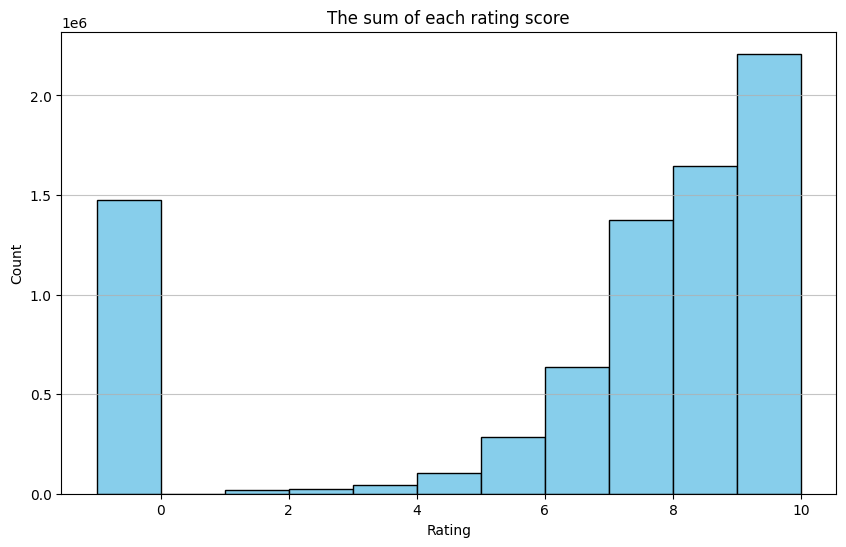

In [13]:
plt.figure(figsize=(10,6))
plt.hist(rating['rating'], bins=range(-1, 11), color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('The sum of each rating score')
plt.grid(axis='y', alpha=0.75)
plt.show()

Total # of user:  73515
Total # of anime:  11200


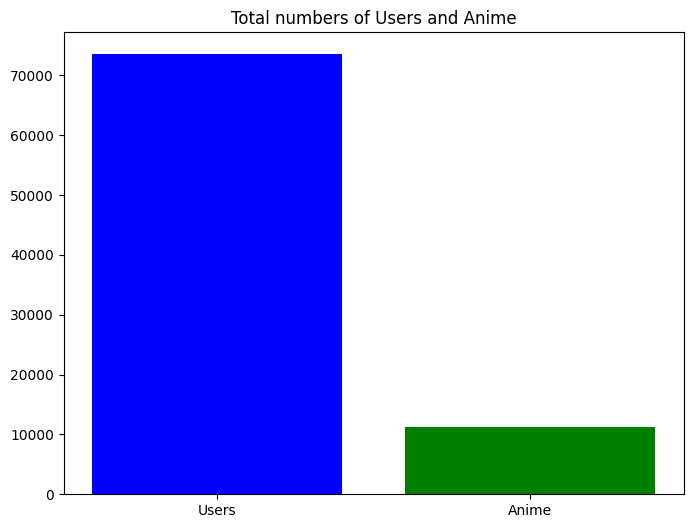

In [14]:
num_users = len(rating.user_id.unique())
num_anime = len(rating.anime_id.unique())

print("Total # of user: ", num_users)
print("Total # of anime: ", num_anime)

plt.figure(figsize=(8, 6))
plt.bar(['Users', 'Anime'], [num_users, num_anime], color=['blue', 'green'])
plt.title("Total numbers of Users and Anime")
plt.show()

In [15]:
anime['genre'] = anime['genre'].str.split(', ')

In [16]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266


In [17]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [18]:
anime_clean = anime.dropna()

In [19]:
anime_clean.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [20]:
genre_flatten = [genre for sublist in anime_clean['genre'] for genre in sublist]

unique_genres = pd.Series(genre_flatten).unique()
print("Total # of genre: ", len(unique_genres))
print("List of all genre availabel: ", unique_genres)

Total # of genre:  43
List of all genre availabel:  ['Drama' 'Romance' 'School' 'Supernatural' 'Action' 'Adventure' 'Fantasy'
 'Magic' 'Military' 'Shounen' 'Comedy' 'Historical' 'Parody' 'Samurai'
 'Sci-Fi' 'Thriller' 'Sports' 'Super Power' 'Space' 'Slice of Life'
 'Mecha' 'Music' 'Mystery' 'Seinen' 'Martial Arts' 'Vampire' 'Shoujo'
 'Horror' 'Police' 'Psychological' 'Demons' 'Ecchi' 'Josei' 'Shounen Ai'
 'Game' 'Dementia' 'Harem' 'Cars' 'Kids' 'Shoujo Ai' 'Hentai' 'Yaoi'
 'Yuri']


In [21]:
anime_new = anime_clean[['anime_id', 'name', 'genre']]
anime_new

,anime_id,name,genre
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai]
12290,5543,Under World,[Hentai]
12291,5621,Violence Gekiga David no Hoshi,[Hentai]
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai]


In [22]:
r_rated_genres = ['Yaoi', 'Yuri', 'Hentai', 'Shounen Ai', 'Shoujo Ai']

mask = anime_new['genre'].apply(lambda x: any(genre in x for genre in r_rated_genres))

anime_final = anime_new[~mask]
anime_final

,anime_id,name,genre
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...
10891,11095,Zouressha ga Yatte Kita,[Adventure]
10892,7808,Zukkoke Knight: Don De La Mancha,"[Adventure, Comedy, Historical, Romance]"
10893,28543,Zukkoke Sannin-gumi no Hi Asobi Boushi Daisakusen,"[Drama, Kids]"
10894,18967,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,"[Comedy, Historical, Sci-Fi]"


In [23]:
anime_final['genre_str'] = anime_final['genre'].apply(lambda x: ' '.join(g.replace(' ', '') for g in x))
anime_final

<ipython-input-23-c4e0b40f75e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_final['genre_str'] = anime_final['genre'].apply(lambda x: ' '.join(g.replace(' ', '') for g in x))


,anime_id,name,genre,genre_str
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Drama Romance School Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",Sci-Fi Thriller
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",Action Comedy Historical Parody Samurai Sci-Fi...
...,...,...,...,...
10891,11095,Zouressha ga Yatte Kita,[Adventure],Adventure
10892,7808,Zukkoke Knight: Don De La Mancha,"[Adventure, Comedy, Historical, Romance]",Adventure Comedy Historical Romance
10893,28543,Zukkoke Sannin-gumi no Hi Asobi Boushi Daisakusen,"[Drama, Kids]",Drama Kids
10894,18967,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,"[Comedy, Historical, Sci-Fi]",Comedy Historical Sci-Fi


In [24]:
rating = rating[:100000]
print("The size of rating dataset: ", len(rating))
rating

The size of rating dataset:  100000


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
99995,1028,5507,-1
99996,1028,5678,8
99997,1028,5680,8
99998,1028,5681,10


In [25]:
num_users = len(rating.user_id.unique())
num_anime = len(rating.anime_id.unique())

print("Total # of users after reduction: ", num_users)
print("Total # of anime after reduction: ", num_anime)

Total # of users after reduction:  1028
Total # of anime after reduction:  5154


In [26]:
rating.isnull().sum()

,0
user_id,0
anime_id,0
rating,0


In [27]:
user_ids = rating['user_id'].unique().tolist()
print("List user_id: ", user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print("Encoded user_id: ", user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("Decoded user_id: ", user_encoded_to_user)

List user_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [28]:
anime_ids = rating['anime_id'].unique().tolist()
print("List anime_id: ", anime_ids)

anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
print("Encoded anime_id: ", anime_to_anime_encoded)

anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}
print("Decoded anime_id: ", anime_encoded_to_anime)

List anime_id:  [20, 24, 79, 226, 241, 355, 356, 442, 487, 846, 936, 1546, 1692, 1836, 2001, 2025, 2144, 2787, 2993, 3455, 4063, 4214, 4224, 4581, 4744, 4898, 4999, 5034, 5277, 5667, 5781, 5958, 6163, 6205, 6324, 6500, 6547, 6682, 6707, 6747, 6773, 6793, 7088, 7148, 7593, 7739, 7858, 8074, 8407, 8424, 8525, 8630, 8841, 9041, 9062, 9136, 9181, 9330, 9367, 9515, 9581, 9675, 9750, 9790, 9919, 10067, 10073, 10076, 10079, 10080, 10209, 10578, 10604, 10719, 10790, 10793, 10794, 10805, 10897, 11161, 11266, 11617, 11737, 11757, 11759, 11771, 12293, 12549, 12729, 13357, 13367, 13411, 13561, 13663, 13759, 14749, 14813, 14833, 14967, 15117, 15437, 15451, 15583, 15609, 16011, 16498, 16706, 17265, 17729, 18247, 18277, 18753, 18897, 19163, 19221, 19285, 19429, 19815, 20045, 20785, 20787, 21033, 21881, 22147, 22199, 22319, 22535, 22547, 22663, 22877, 23233, 23321, 23847, 24133, 24455, 24873, 25099, 25157, 25159, 25283, 25397, 26243, 27775, 27899, 28121, 28677, 29093, 29095, 30015, 30296, 30544, 31338

In [29]:
# Map the encoded user_id and anime_id into new columns
rating['user'] = rating['user_id'].map(user_to_user_encoded)
rating['anime'] = rating['anime_id'].map(anime_to_anime_encoded)

In [30]:
rating['rating'] = rating['rating'].replace(-1, 0)

min_rating = min(rating['rating'])
max_rating = max(rating['rating'])

print("Lowest rating: ", min_rating)
print("Highest rating: ", max_rating)

# change to float
rating['rating'] = rating['rating'].values.astype(np.float32)

Lowest rating:  0
Highest rating:  10


In [31]:
rating = rating.sample(frac=1, random_state=69)
rating

,user_id,anime_id,rating,user,anime
36323,395,25867,8.0,394,1517
28232,321,22547,7.0,320,127
90490,940,13239,0.0,939,4483
28289,321,28999,9.0,320,761
12007,154,106,8.0,153,2055
...,...,...,...,...,...
47508,503,578,9.0,502,835
25015,293,3420,7.0,292,1886
9818,123,18679,7.0,122,255
69577,728,23227,0.0,727,735


In [32]:
x = rating[['user', 'anime']].values

# Normalization using min max scaler
y = rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print("Training data: ", x)
print("Validation data: ", y)

Training data:  [[ 394 1517]
 [ 320  127]
 [ 939 4483]
 ...
 [ 122  255]
 [ 727  735]
 [ 661  211]]
Validation data:  [0.8 0.7 0.  ... 0.7 0.  0.9]


In [33]:
data = anime_final
data.sample(5)

,anime_id,name,genre,genre_str
6492,30886,Mu Di,[Music],Music
6192,1955,Kimagure Robot,"[Comedy, Fantasy, Sci-Fi]",Comedy Fantasy Sci-Fi
10233,16510,Shin Shounan Bakusouzoku Arakure Knight,[Adventure],Adventure
1580,5947,Tengen Toppa Gurren Lagann Movie: Lagann-hen S...,[Comedy],Comedy
9148,7479,Karate Baka Ichidai,"[Historical, Martial Arts, Sports]",Historical MartialArts Sports


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer()

tfv.fit(data['genre_str'])

tfv.get_feature_names_out()

array(['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons',
       'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem', 'historical',
       'horror', 'josei', 'kids', 'magic', 'martialarts', 'mecha',
       'military', 'music', 'mystery', 'parody', 'police',
       'psychological', 'romance', 'samurai', 'school', 'sci', 'seinen',
       'shoujo', 'shounen', 'sliceoflife', 'space', 'sports',
       'supernatural', 'superpower', 'thriller', 'vampire'], dtype=object)

In [35]:
tfidf_matrix = tfv.fit_transform(data['genre_str'])

tfidf_matrix.shape

(10733, 39)

In [36]:
# Create dataframe to view tfidf_matrix
# Column is filled with genres
# Row is filled with anime names

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfv.get_feature_names_out(),
    index=data['name']
).sample(10, axis=1).sample(5, axis=0)

,mecha,comedy,drama,samurai,fi,fantasy,space,ecchi,demons,psychological
name,,,,,,,,,,
Agigongryong Doolie,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Tantei Opera Milky Holmes Movie: Gyakushuu no Milky Holmes,0.0,0.304992,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Marude Dameo,0.0,0.368031,0.000000,0.0,0.525451,0.0,0.0,0.0,0.0,0.0
Tsuki wa Higashi ni Hi wa Nishi ni: Operation Sanctuary,0.0,0.249865,0.364286,0.0,0.356742,0.0,0.0,0.0,0.0,0.0
Hangyodon no Parallel Daisakusen: Hana no Oedo wa Oosawagi,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14596888, 0.        , ..., 0.29799153, 0.        ,
        0.        ],
       [0.14596888, 1.        , 0.17688183, ..., 0.23069816, 0.        ,
        0.        ],
       [0.        , 0.17688183, 1.        , ..., 0.        , 0.58198958,
        0.19632063],
       ...,
       [0.29799153, 0.23069816, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.58198958, ..., 0.        , 1.        ,
        0.3373267 ],
       [0.        , 0.        , 0.19632063, ..., 0.        , 0.3373267 ,
        1.        ]])

In [38]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print("Shape: ", cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape:  (10733, 10733)


name,Kami nomi zo Shiru Sekai: Tenri-hen,Saijaku Muhai no Bahamut,Baka to Test to Shoukanjuu Specials,Spy Gekimetsu,Ai no Wakakusa Monogatari,Sekai Meisaku Douwa: Hakuchou no Ouji,Kazemakase Tsukikage Ran,The Everlasting Guilty Crown,Groove Adventure Rave,Kashou no Tsuki: Aki Kyougen
name,,,,,,,,,,
Busou Shinki,0.000000,0.106353,0.000000,0.00000,0.336249,0.000000,0.000000,0.000000,0.000000,0.000000
Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,0.316812,0.377362,0.483150,0.00000,0.240665,0.000000,0.073386,0.000000,0.398687,0.242158
Inochi no Chikyuu: Dioxin no Natsu,0.000000,0.000000,0.000000,0.00000,0.492775,0.000000,0.000000,0.000000,0.000000,0.000000
Nobiro Nobiro Daisuki na Ki,0.000000,0.159459,0.000000,0.00000,0.000000,0.591153,0.000000,0.806559,0.261933,0.000000
Kintarou Taiiku Nikki,0.254140,0.000000,0.354854,0.00000,0.000000,0.000000,0.219072,0.000000,0.319819,0.000000
Mini Sengoku Basara Two: Tsukiyo no Katakura-kun,0.117085,0.000000,0.163485,0.57439,0.577920,0.000000,0.475508,0.000000,0.147344,0.454195
Armageddon,0.000000,0.113790,0.000000,0.00000,0.000000,0.000000,0.146293,0.000000,0.213571,0.000000
Hitsugi no Chaika: Avenging Battle,0.454124,0.360302,0.105200,0.00000,0.000000,0.410725,0.183784,0.000000,0.926960,0.214307
Sword Art Online II: Sword Art Offline II,0.254140,0.000000,0.354854,0.00000,0.000000,0.000000,0.219072,0.000000,0.319819,0.000000


In [39]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['name', 'genre']], k=5):
  """
  Rekomendasi anime berdasarkan kemiripan di dataframe

  Parameter:
  nama_anime: tipe data string (str)
  similarity_data: tipe data pd.DataFrame (object), kesamaan dataframe dengan anime sebagai index dan kolom
  items: tipe data pd.DataFrame (object), mengandung kedua nama dan fitur lainnya untuk mendefinisikan kemiripan
  k: tipe data integer (int), jumlah rekomendasi yang ingin didapatkan
  """

  index = similarity_data.loc[:, nama_anime].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2):-1]]

  closest = closest.drop(nama_anime, errors='ignore')

  pd.set_option('display.max_columns', None)
  return pd.DataFrame(closest).merge(items).head(k)

In [40]:
anime_input = input("Input anime name: ")
data[data['name'].str.contains(anime_input, case=False)]

Input anime name: Busou Shinki


,anime_id,name,genre,genre_str
4588,11103,Busou Shinki Moon Angel,"[Action, Sci-Fi]",Action Sci-Fi
4711,16614,Busou Shinki OVA,"[Action, Sci-Fi]",Action Sci-Fi
5582,14237,Busou Shinki,"[Action, Sci-Fi, Slice of Life]",Action Sci-Fi SliceofLife


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [41]:
# Get top-N Recommendations based from anime input list
anime_recommendations('Kizumonogatari I: Tekketsu-hen', k=10)

,name,genre
0,Vampire Holmes,"[Comedy, Mystery, Supernatural, Vampire]"
1,Kizumonogatari II: Nekketsu-hen,"[Action, Mystery, Supernatural, Vampire]"
2,Bakemonogatari,"[Mystery, Romance, Supernatural, Vampire]"
3,Monogatari Series: Second Season,"[Comedy, Mystery, Romance, Supernatural, Vampire]"
4,Shiki Specials,"[Horror, Mystery, Supernatural, Vampire]"
5,Vampire Knight,"[Drama, Mystery, Romance, Shoujo, Supernatural..."
6,Vampire Knight Guilty,"[Drama, Mystery, Romance, Shoujo, Supernatural..."
7,Shiki,"[Mystery, Supernatural, Thriller, Vampire]"
8,Trinity Blood,"[Action, Supernatural, Vampire]"
9,Dance in the Vampire Bund Recap,"[Action, Supernatural, Vampire]"


In [42]:
class RecommenderNet(tf.keras.Model):

  # Function initialization
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.anime_embedding = layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    anime_vector = self.anime_embedding(inputs[:, 1])
    anime_bias = self.anime_bias(inputs[:, 1])

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x)

In [43]:
model = RecommenderNet(num_users, num_anime, 100)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [44]:
modelku = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 48,
    epochs=3,
    validation_data=(x_val, y_val)
)

Epoch 1/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - loss: 0.6521 - mean_absolute_error: 0.2921 - val_loss: 0.5808 - val_mean_absolute_error: 0.2248
Epoch 2/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.5732 - mean_absolute_error: 0.2166 - val_loss: 0.5459 - val_mean_absolute_error: 0.2075
Epoch 3/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.5423 - mean_absolute_error: 0.1990 - val_loss: 0.5213 - val_mean_absolute_error: 0.1791


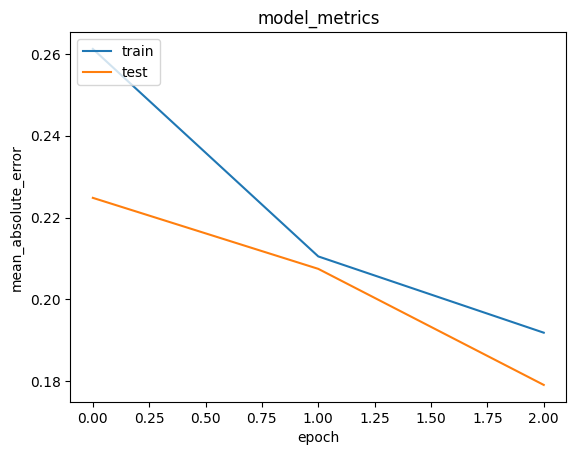

In [45]:
plt.plot(modelku.history['mean_absolute_error'])
plt.plot(modelku.history['val_mean_absolute_error'])
plt.title('model_metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
anime_df = anime_final

# get sample user
user_id = rating.user_id.sample(1).iloc[0]
anime_watched_by_user = rating[rating.user_id == user_id]

anime_not_watched = anime_df[~anime_df['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id']
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [47]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print(f"Showing recommendations for user: {user_id}")
print("=" * 40)

print("Anime with high ratings from user")
print("-" * 40)

top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
  print(f"{row.name} : {', '.join(row.genre)}")

print('-' * 40)
print("Top 10 anime recommendations")
print('-' * 40)

recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
  print(f"{row.name} : {', '.join(row.genre)}")

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for user: 1027
Anime with high ratings from user
----------------------------------------
Fate/Zero 2nd Season : Action, Fantasy, Supernatural, Thriller
Angel Beats! : Action, Comedy, Drama, School, Supernatural
Kami nomi zo Shiru Sekai II : Comedy, Harem, Romance, Shounen, Supernatural
Kami nomi zo Shiru Sekai : Comedy, Harem, Romance, Shounen, Supernatural
Toaru Majutsu no Index : Action, Magic, Sci-Fi, Super Power
----------------------------------------
Top 10 anime recommendations
----------------------------------------
Fullmetal Alchemist: Brotherhood : Action, Adventure, Drama, Fantasy, Magic, Military, Shounen
Sen to Chihiro no Kamikakushi : Adventure, Drama, Supernatural
Code Geass: Hangyaku no Lelouch : Action, Mecha, Military, School, Sci-Fi, Super Power
Mushishi : Adventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, Supernatural
Re:Zero kara Hajimeru Isekai Seikatsu : Drama, Fantasy, Psychological,